In [3]:
import pandas as pd
count = pd.read_table("TAD_groups_count.tsv",index_col=0)

In [7]:
is_present = count.copy()

In [9]:
is_present[is_present >= 1] = 1

In [12]:
count["present_species"] = is_present.sum(axis = 1)

In [17]:
data = count.melt(id_vars=["present_species"],value_vars=count.columns[:-1],
           var_name="species",value_name="number").groupby(["species","present_species"])["number"].sum()

In [20]:
import seaborn as sns
data = data.reset_index()

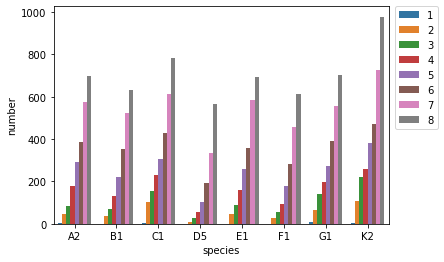

In [25]:
import matplotlib.pyplot as plt

sns.barplot(x = "species",y = "number",hue = "present_species",data = data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("present.pdf")